In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2
%matplotlib inline

In [2]:
# Number of corners in x and y direction in the chessboard images 
ncorners_x = 9
ncorners_y = 6
camera_calib_img_dir = r'.\camera_cal'

chess_images_distorted = glob.glob(camera_calib_img_dir + '\*.jpg')

In [3]:
def display_image_grid(shape, images):
    rows = shape[0]
    cols = shape[1]
    f, ax = plt.subplots(rows, cols, figsize=(16, 11))
    f.tight_layout()
    i = 0
    for row in range(rows):
        for col in range(cols):
            ax[row,col].imshow(images[i])
            i += 1
        row += 1
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

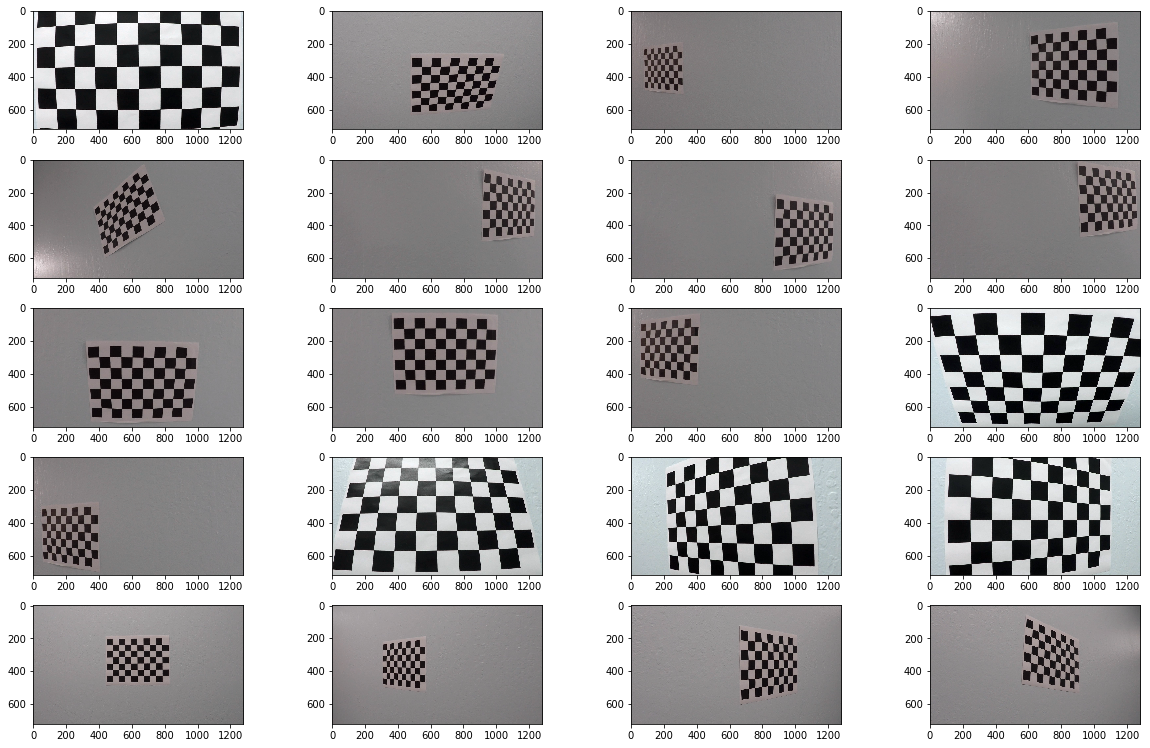

In [4]:
num_images = len(chess_images_distorted)
imgs = [cv2.imread(image) for image in chess_images_distorted]
rows, cols = num_images // 4, 4
display_image_grid((rows, cols), imgs)

In [5]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ncorners_x*ncorners_y,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
print(objp)

[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [8. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [8. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7. 3. 0.]
 [8. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [7. 4. 0.]
 [8. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]
 [8. 5. 0.]]


In [6]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
corner_images_folder = r'.\output_images\corner_images'

In [7]:
def generate_chessboard_corners():
    images = [np.copy(image) for image in imgs]
    for idx in range(num_images):
        img = images[idx]
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (ncorners_x, ncorners_y), None)

        # If found, add object points, image points
        if ret == True:
            #print("corners detected for index:", idx)
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            cv2.drawChessboardCorners(img, (ncorners_x, ncorners_y), corners, ret)
            #cv2.imshow('img', img)
            #cv2.waitKey(500)
            cv2.imwrite(corner_images_folder + r'\corner' + str(idx) + '.jpg', img)
        else:
            print("corners not detected for index:", idx)
    #cv2.destroyAllWindows()
    #display_image_grid((rows, cols), images)
generate_chessboard_corners()

corners not detected for index: 0
corners not detected for index: 14
corners not detected for index: 15


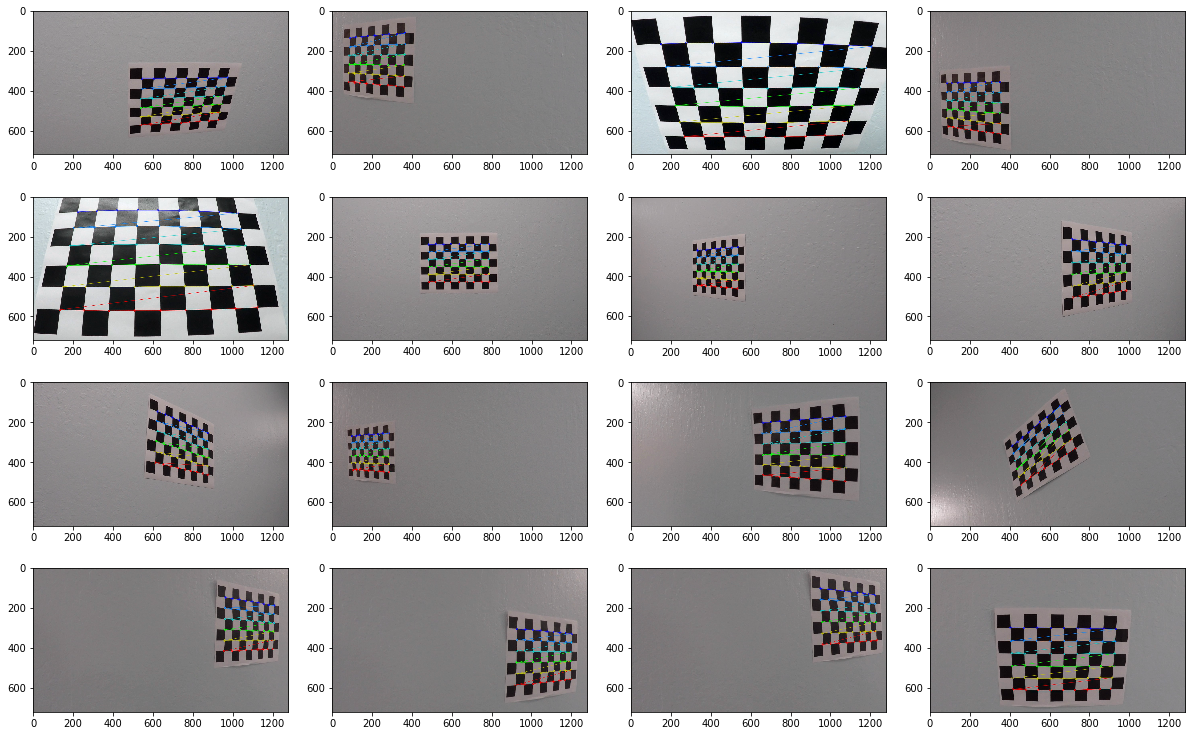

In [8]:
# Display some of the images with corners
def display_corner_images():
    corner_images = glob.glob(corner_images_folder + r'\*.jpg')
    num_images = len(corner_images)
    imgs = [cv2.imread(image) for image in corner_images]
    rows, cols = num_images // 4, 4
    display_image_grid((rows, cols), imgs)

display_corner_images()

In [10]:
# Test undistortion on an image
img = cv2.imread(camera_calib_img_dir + r'\calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, camera_mtx, distortion_vctr, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
print(camera_mtx)

[[1.15396093e+03 0.00000000e+00 6.69705359e+02]
 [0.00000000e+00 1.14802495e+03 3.85656232e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


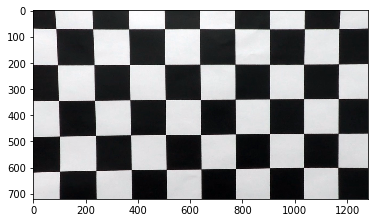

In [11]:
dst = cv2.undistort(img, camera_mtx, distortion_vctr, None, camera_mtx)
plt.imshow(dst)

In [19]:
undist_img_dir = r".\undistorted_images"
def get_undistorted_images(img_dir):
    distorted_images = glob.glob(img_dir + r'\*.jpg')
    #images = [cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB) for image in distorted_images]
    images = [cv2.imread(image) for image in distorted_images]
    undist_imgs = []
    i = 0
    for image in images:
        dst = cv2.undistort(image, camera_mtx, distortion_vctr, None, camera_mtx)
        undist_imgs.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
        cv2.imwrite(undist_img_dir + r'\undist' + str(i) + '.jpg', dst)
        i += 1
    return undist_imgs

In [20]:
test_images_dir = r'.\test_images'
undistorted_images = get_undistorted_images(test_images_dir)